# Importing Libs

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.calibration import CalibratedClassifierCV

# Loading Data

In [4]:
raw_df = pd.read_csv('C:\Python\Lending_Club_Data.csv')

# Checking Nans

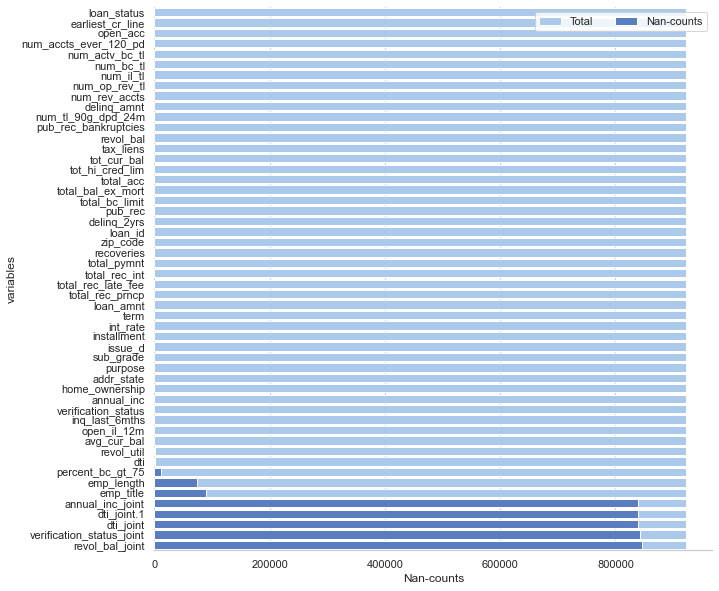

In [5]:
raw = raw_df.copy()
nans = pd.DataFrame(raw.isnull().sum())
nans = nans.reset_index()
nans.columns = ['variables','Nan-counts']
nans = nans.sort_values('Nan-counts')
nans = nans.reset_index(drop=True)
nans['total'] = raw.shape[0]
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.set_color_codes("pastel")
sns.barplot(x="total", y="variables", data=nans,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="Nan-counts", y="variables", data=nans,
            label="Nan-counts", color="b")

ax.legend(ncol=2, loc="upper right", frameon=True)

sns.despine(left=True, bottom=False)
#f.savefig(r'F:\BigData\Lending Club\Lending Club\nan_plot.png')

# Data Stucture (categories)

<AxesSubplot:xlabel='total_pymnt', ylabel='Count'>

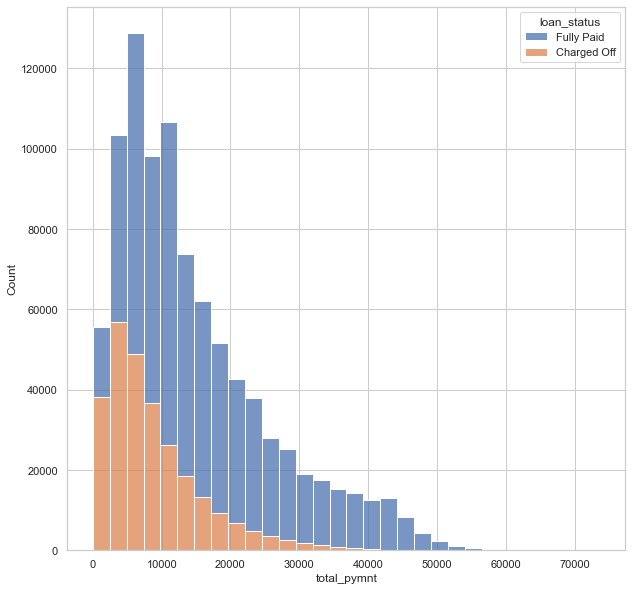

In [6]:
f, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=raw,x='total_pymnt',hue='loan_status', multiple="stack",bins=30)
# for some features, the majority is in 0 

<AxesSubplot:xlabel='home_ownership', ylabel='Count'>

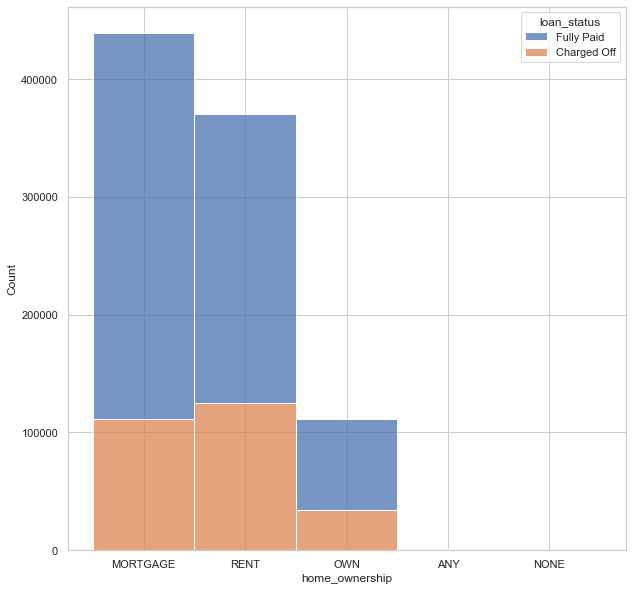

In [7]:
f, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=raw,x='home_ownership',hue='loan_status', multiple="stack",bins=30)
# some classes in the category has very few instances

<AxesSubplot:xlabel='installment', ylabel='Count'>

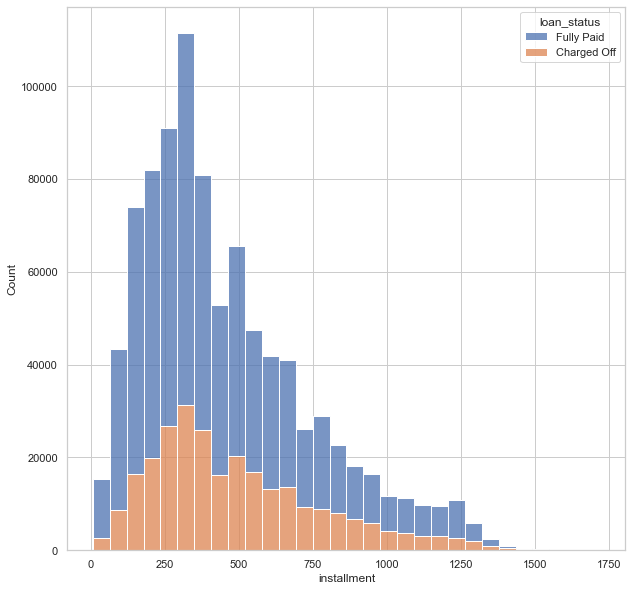

In [8]:
f, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=raw,x='installment',hue='loan_status', multiple="stack",bins=30)
# for some continuous features, significant outliers